In [1]:
%matplotlib inline

import numpy                as np
import matplotlib.image     as mpimg
import matplotlib.pyplot    as plt
import matplotlib.animation as animation

In [2]:
def rgbTogray(im):
    try:
        gray = np.zeros_like(im)
        r, g, b = im[...,0], im[...,1], im[...,2]
        gray = (0.2126 * r + 0.7152 * g + 0.0722 * b) * 255
        return np.uint8(gray)
    except ValueError:
        print("ERROR: RGB image needed.")
        return im

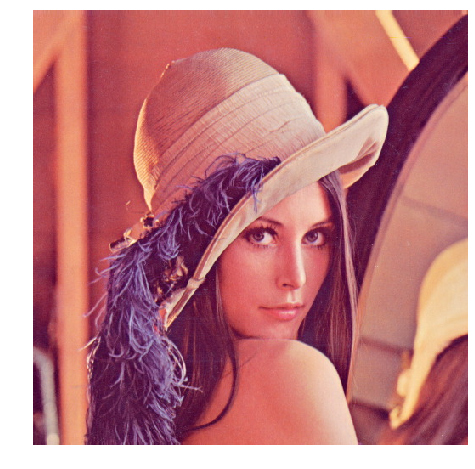

In [3]:
lena = mpimg.imread('../Images/Lena.png')
plt.figure(figsize=(8,8))
plt.imshow(lena)
plt.axis('off');

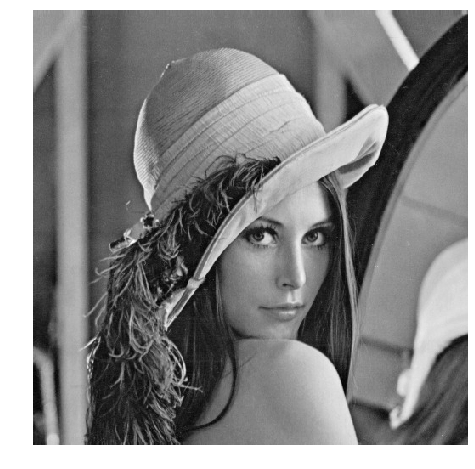

In [4]:
lena_gray = rgbTogray(lena)
plt.figure(figsize=(8,8))
plt.imshow(lena_gray, cmap='gray')
plt.axis('off');

In [5]:
def SobelOperator(image):
    feature_map_x = np.zeros_like(image, dtype=int)
    feature_map_y = np.zeros_like(image, dtype=int)
    magnitudes    = np.zeros_like(image, dtype=float)
    Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    Gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    for l in range(1, image.shape[0]-1):
        for c in range(1, image.shape[1]-1):
            roi = image[l-1:l+2, c-1:c+2]
            feature_map_x[l, c] = np.sum(roi*Gx)
            feature_map_y[l, c] = np.sum(roi*Gy)
            magnitudes[l, c]    = (feature_map_x[l, c]**2 + feature_map_y[l, c]**2) ** 0.5
    return(magnitudes, feature_map_x, feature_map_y)    

In [6]:
mag, gx, gy = SobelOperator(lena_gray)

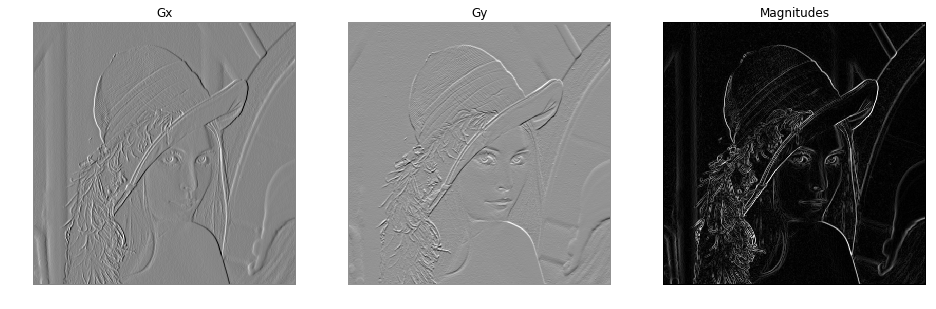

In [7]:
fig = plt.figure(figsize=(16,16))
a = fig.add_subplot(1,3,1)
a.set_title('Gx')
plt.imshow(gx, cmap='gray')
plt.axis('off')
a = fig.add_subplot(1,3,2)
a.set_title('Gy')
plt.axis('off')
plt.imshow(gy, cmap='gray')
a = fig.add_subplot(1,3,3)
a.set_title('Magnitudes')
plt.axis('off')
plt.imshow(mag, cmap='gray');

In [8]:
def thresholdSobel(magnitudes, thresholdMin, thresholdMax):
    magnitudes = np.maximum(magnitudes, thresholdMin)
    magnitudes = np.minimum(magnitudes, thresholdMax)
    magnitudes[magnitudes == thresholdMin] = 0
    magnitudes[magnitudes == thresholdMax] = 255
    return np.uint8(magnitudes)

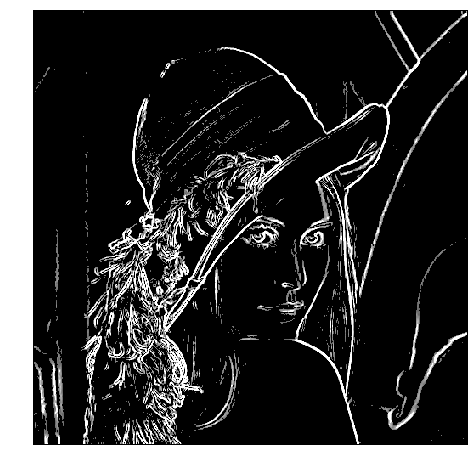

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(thresholdSobel(mag, 100, 200), cmap='gray')
plt.axis('off');

Check what happens while we change the threshold.

<img src="sobel_operator_threshold.gif" alt="Sobel Threshold Animation"/>

https://imagemagick.org/script/download.php

In [ ]:
%%capture
fig, (image, meter) = plt.subplots(1,2, figsize=(8,6), gridspec_kw = {'width_ratios':[5, 1]})

In [ ]:
maxValue     = np.max(mag)
thresholdMin = np.arange(0, maxValue, 20.)
thresholdMax = np.arange(0, maxValue, 20.)
thresholds   = []
numThres     = np.int(np.min([thresholdMin.size, thresholdMax.size]))

for i in range(numThres):
    t = [thresholdMin[i], thresholdMax[-1]]
    thresholds.append(t)
    
for i in range(1,numThres):
    t = [thresholdMin[-i], thresholdMax[-1]]
    thresholds.append(t)
    
for i in range(1,numThres):
    t = [0., thresholdMax[-i]]
    thresholds.append(t)
    
for i in range(numThres):
    t = [0., thresholdMax[i]]
    thresholds.append(t)    

In [ ]:
image.axis('off')
image.set_title('')
im = image.imshow(thresholdSobel(mag, 0, maxValue), animated=True, cmap='gray')

In [ ]:
meter.clear()
meter.set_title('thresholds')
meter.set_ylim([0,thresholdMax[-1]])
bars = meter.bar(np.arange(2), (0,0), color=('b','r'), edgecolor='k', tick_label=('Min','Max'))

In [ ]:
def updatefig(i):
    im.set_array(thresholdSobel(mag, thresholds[i][0], thresholds[i][1]))   
    bars[0].set_height(thresholds[i][0])
    bars[1].set_height(thresholds[i][1])
    return im,

In [ ]:
ani = animation.FuncAnimation(fig, updatefig, frames=np.arange(0, len(thresholds)), interval=100, blit=True)
ani.save('sobel_operator_threshold.gif', dpi=80, writer='imagemagick')